# Implement Neural Network

We will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from utils.data_utils import get_CIFAR10_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

We will use the class `FullyConnectedNet` in the file `classifiers/fully_connected_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
from classifiers.fully_connected_net import *

# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return FullyConnectedNet(input_dim=input_size, hidden_dims=[hidden_size], num_classes=num_classes, 
                             weight_scale=1e-1, reg=0.1, dtype=np.float64)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `classifiers/fully_connected_net.py` and look at the method `FullyConnectedNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720925453725e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [7]:
loss, _ = net.loss(X, y)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [8]:
from utils.gradient_check import eval_numerical_gradient
from utils.gradient_check import *

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447687e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Neural Network (non-linear classifier)
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers.

Once you have implemented the method, run the code below to train a two-layer network on data. You should achieve a training loss less than 0.02.

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [9]:
cifar10_dataset = get_CIFAR10_data(cifar10_dir='./datasets/cifar-10-batches-py')

X_train = cifar10_dataset['X_train']
y_train = cifar10_dataset['y_train']
X_dev = cifar10_dataset['X_dev']
y_dev = cifar10_dataset['y_dev']
X_val = cifar10_dataset['X_val']
y_val = cifar10_dataset['y_val']
X_test = cifar10_dataset['X_test']
y_test = cifar10_dataset['y_test']

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Dev data shape: ', X_dev.shape)
print('Dev labels shape: ', y_dev.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (49000, 32, 32, 3)
Training labels shape:  (49000,)
Dev data shape:  (5000, 32, 32, 3)
Dev labels shape:  (5000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


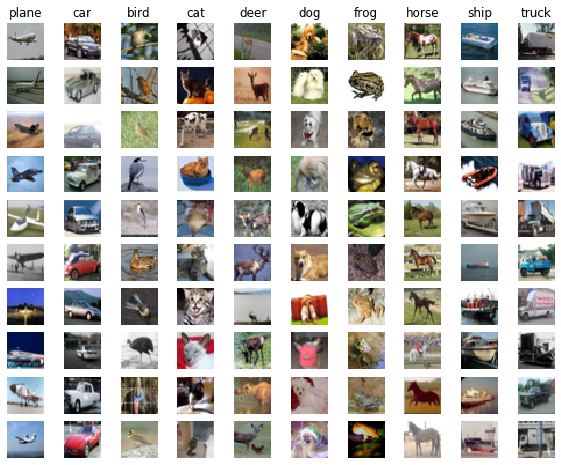

In [10]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

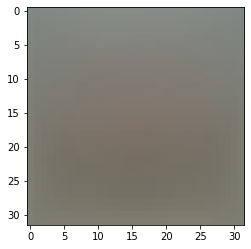

In [11]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [12]:
# subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [13]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_dev.shape, X_val.shape, X_test.shape)

(49000, 3072) (5000, 3072) (1000, 3072) (10000, 3072)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [31]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

from utils.solver import Solver

small_data = {
    'X_train': X_train,
    'y_train': y_train,
    'X_val': X_test,
    'y_val': y_test,
}
  
learning_rate = 1e-3

model = FullyConnectedNet(input_dim=input_size, hidden_dims=[hidden_size], num_classes=num_classes, 
                          weight_scale=1e-3, reg=1e1)
solver = Solver(model, small_data, 
                print_every=1000, num_epochs=10, batch_size=200,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )

solver.train()

(Epoch 0 / 10) train acc: 0.124000; val_acc: 0.130500
(Epoch 1 / 10) train acc: 0.370000; val_acc: 0.372200
(Epoch 2 / 10) train acc: 0.381000; val_acc: 0.383600
(Epoch 3 / 10) train acc: 0.386000; val_acc: 0.386300
(Epoch 4 / 10) train acc: 0.370000; val_acc: 0.394200
(Iteration 1000 / 2450) loss: 1.980873
(Epoch 5 / 10) train acc: 0.372000; val_acc: 0.391500
(Epoch 6 / 10) train acc: 0.400000; val_acc: 0.395000
(Epoch 7 / 10) train acc: 0.439000; val_acc: 0.397600
(Epoch 8 / 10) train acc: 0.384000; val_acc: 0.390400
(Iteration 2000 / 2450) loss: 1.882885
(Epoch 9 / 10) train acc: 0.383000; val_acc: 0.389700
(Epoch 10 / 10) train acc: 0.388000; val_acc: 0.394600


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

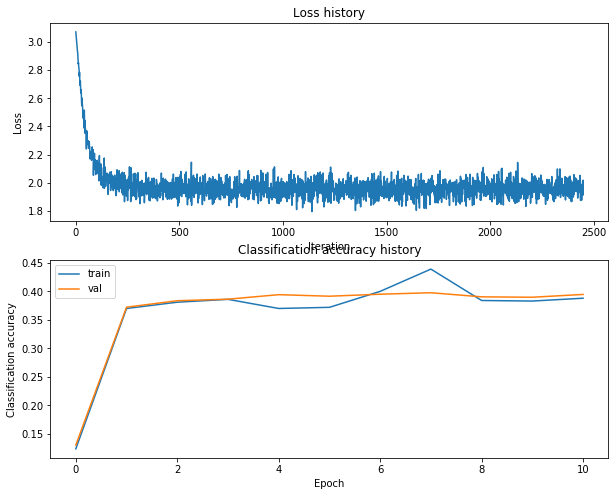

In [32]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, label='train')
plt.plot(solver.val_acc_history, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

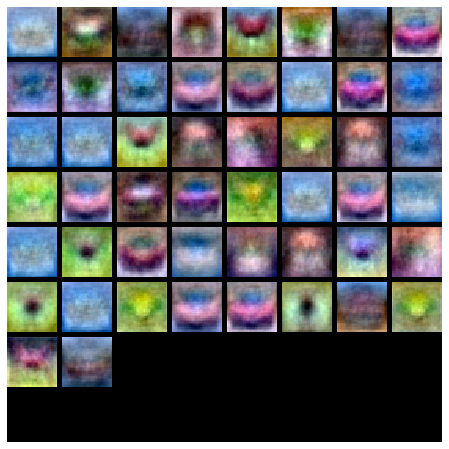

In [33]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = model.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

In [42]:
best_net = None # store the best model into this 
best_val = -1
results = {}
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
input_size = 32 * 32 * 3
num_classes = 10

model_count = 10
for count in np.arange(model_count):
    hidden_size = int(np.random.uniform(80,100))
    lr = 10 ** np.random.uniform(-4, -3)
    reg = 10 ** np.random.uniform(-2, -1)
    
    net = FullyConnectedNet(input_dim=input_size, hidden_dims=[hidden_size], num_classes=num_classes, reg=reg)

    solver = Solver(model, small_data, 
                print_every=1000, num_epochs=10, batch_size=200,
                update_rule='sgd',
                optim_config={
                  'learning_rate': lr,
                },
                verbose=False
         )

    solver.train()
    
    # Predict on the training set
    train_accuracy = np.mean(solver.train_acc_history)
    
    # Predict on the validation set
    val_accuracy = np.mean(solver.val_acc_history)
    
    if best_val < val_accuracy:
        best_val = val_accuracy
        best_net = net
        
    results[(lr, reg, hidden_size)] = (train_accuracy, val_accuracy)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg, hidden_size in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hidden_size)]
    print('lr %e reg %e hidden_size %d train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_size, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.051838e-04 reg 4.176183e-02 hidden_size 83 train accuracy: 0.410182 val accuracy: 0.407027
lr 1.329901e-04 reg 3.856384e-02 hidden_size 83 train accuracy: 0.397455 val accuracy: 0.408045
lr 2.082203e-04 reg 5.275295e-02 hidden_size 85 train accuracy: 0.401545 val accuracy: 0.407700
lr 2.512601e-04 reg 5.388609e-02 hidden_size 90 train accuracy: 0.404091 val accuracy: 0.405709
lr 3.131427e-04 reg 8.908848e-02 hidden_size 92 train accuracy: 0.411636 val accuracy: 0.406982
lr 3.196640e-04 reg 1.149674e-02 hidden_size 96 train accuracy: 0.410636 val accuracy: 0.405736
lr 3.529265e-04 reg 1.461667e-02 hidden_size 80 train accuracy: 0.397182 val accuracy: 0.404127
lr 4.591086e-04 reg 6.385879e-02 hidden_size 93 train accuracy: 0.403909 val accuracy: 0.404145
lr 4.890505e-04 reg 2.851707e-02 hidden_size 98 train accuracy: 0.400091 val accuracy: 0.402164
lr 7.732445e-04 reg 1.871040e-02 hidden_size 96 train accuracy: 0.397000 val accuracy: 0.400755
best validation accuracy achieved during

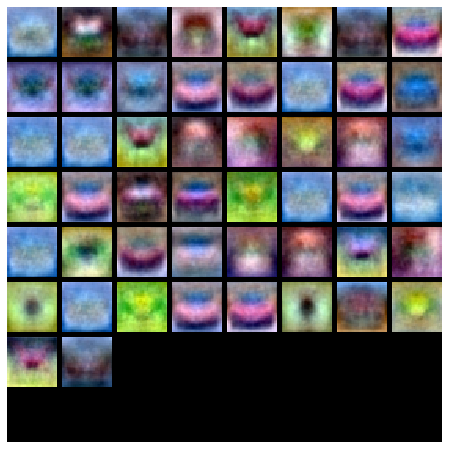

In [43]:
# visualize the weights of the best network
show_net_weights(best_net)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.